In [164]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
 click <a href="javascript:code_toggle()">here</a> to hide the raw code.''')

# viscous shear flow 
In Cartesian coordinates $\vec{v} = (0, v_y(x), 0)$, where $v_y= v_0/\sqrt{4\pi\nu t} \exp{(-(x-x_0)^2/4\nu t)}$ is the analytic solution to 

$\partial_t v = \nu \partial^2_x v$, 

and the initial conditions are at $t=0.5$, $x_0=1.0$, $\nu=0.03$, and $v_0=0.001$. 

## 1. in cartesian coordinates

In [1]:
%matplotlib inline
#%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ath
import seaborn

In [97]:
filename='../../athena++/visc/athena/bin/cart/visc.block0.out1.00000.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='../../athena++/visc/athena/bin/cart/visc.block0.out1.00006.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00006.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
#x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

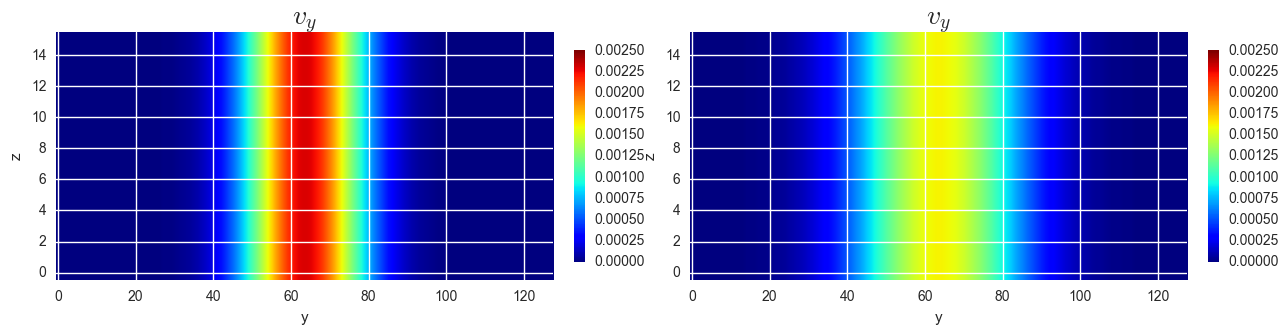

In [98]:
nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.02;pad=0.04

vel_t0=data['mom'][...,1]/data['dens']
vel_t1=data1['mom'][...,1]/data1['dens']

plt.subplot(nframe,nplot,cnt)
plt.imshow(vel_t0[0,:,:],origin='lower',vmin=0,vmax=0.0025,aspect=4,cmap='jet')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(ymin,ymax)
#plt.ylim(zmin,zmax)
plt.xlabel('y')
plt.ylabel('z')
plt.title(r'$v_y$',size=20)

cnt += 1
plt.subplot(nframe,nplot,cnt)
plt.imshow(vel_t1[0,:,:],origin='lower',vmin=0,vmax=0.0025,aspect=4,cmap='jet')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(ymin,ymax)
#plt.ylim(zmin,zmax)
plt.xlabel('y')
plt.ylabel('z')
plt.title(r'$v_y$',size=20)


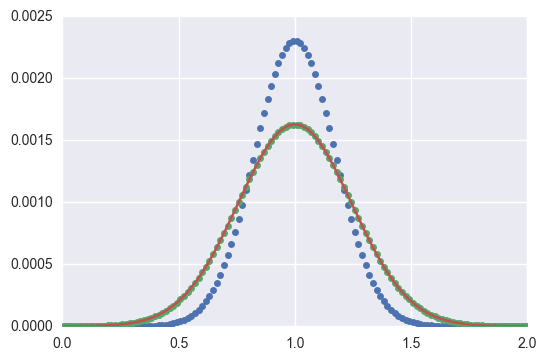

In [99]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.plot(x1v,vel_t0[0,8,:],'.',markersize=10)
plt.plot(x1v,vel_t1[0,8,:],'.',markersize=10)
v0=0.001; nu=0.03; t=1.0; x0=1.0
vy_ana = v0/np.sqrt(4.0*np.pi*nu*t)*np.exp(-(x1v-x0)**2/4.0/nu/t)
plt.plot(x1v,vy_ana)

## 2 in cylindrical coordinates
r=[0.5,5],$N_r=64$ uniform grid; $N_{\phi}=96$

In [100]:
filename='../../athena++/visc/athena/bin/cyl/visc.block0.out1.00000.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='../../athena++/visc/athena/bin/cyl/visc.block0.out1.00006.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00006.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
#x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

In [101]:
R,T  = np.meshgrid(x1v,x2v)
vr = data['mom'][0,:,:,0]/data['dens'][0,:,:]
vt = data['mom'][0,:,:,1]/data['dens'][0,:,:]
vy = vr*np.sin(T)+vt*np.cos(T)
vr1 = data1['mom'][0,:,:,0]/data1['dens'][0,:,:]
vt1 = data1['mom'][0,:,:,1]/data1['dens'][0,:,:]
vy1 = vr1*np.sin(T)+vt1*np.cos(T)

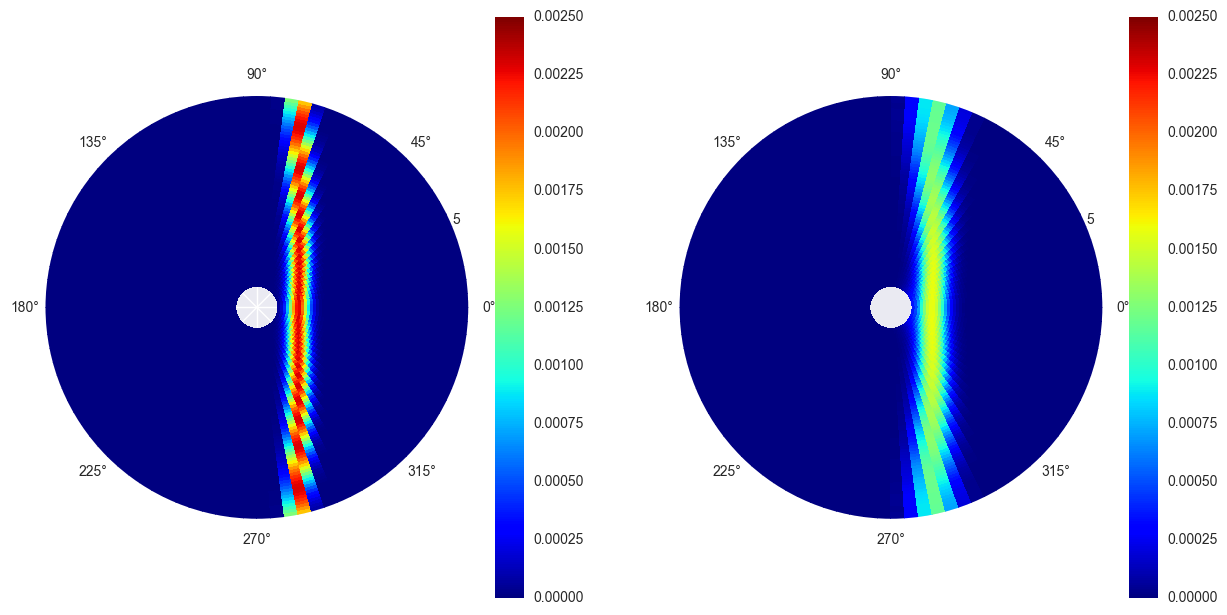

In [102]:
R,T  = np.meshgrid(x1f,x2f)
nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.005;pad=0.04
plt.subplot(nframe,nplot,cnt,polar=True)
plt.pcolormesh(T, R, vy,cmap='jet',vmin=0,vmax=0.0025) #X,Y & data2D must all be same dimensions
plt.colorbar()
plt.grid(True)
cnt+=1
plt.subplot(nframe,nplot,cnt,polar=True)
plt.pcolormesh(T, R, vy1,cmap='jet',vmin=0,vmax=0.0025)
plt.colorbar()
plt.show()

In [104]:
from scipy import interpolate
R,T  = np.meshgrid(x1v,x2v)
xx = R*np.cos(T); yy = R*np.sin(T)
f = interpolate.interp2d(xx, yy, vy,kind='linear')
f1 = interpolate.interp2d(xx, yy, vy1,kind='cubic')

/home/jmshi/local/anaconda/anaconda2/lib/python2.7/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=26,63 m=6144 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/jmshi/local/anaconda/anaconda2/lib/python2.7/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=40,38 m=6144 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


(0, 2)

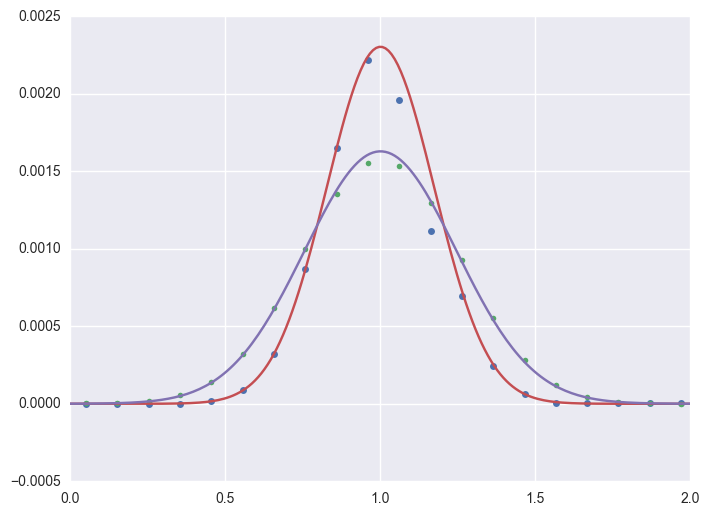

In [105]:
matplotlib.rcParams['figure.figsize'] = (8, 6.0)
xx0=np.linspace(-5,5,100)
yy0=np.linspace(1.0,1.0,100)
znew = f(xx0, yy0)
znew1 = f1(xx0,yy0)
plt.plot(xx0,znew[0,:],'.',markersize=10)
plt.plot(xx0,znew1[10,:],'.',markersize=8)

x1=np.linspace(-5,5,1000)
t=0.5
vy_ana = v0/np.sqrt(4.0*np.pi*nu*t)*np.exp(-(x1-x0)**2/4.0/nu/t)
plt.plot(x1,vy_ana)
t=1.0
vy_ana = v0/np.sqrt(4.0*np.pi*nu*t)*np.exp(-(x1-x0)**2/4.0/nu/t)
plt.plot(x1,vy_ana)
plt.xlim(0,2)

## 3 in spherical coordinates

$N_r=64$, $N_{\theta}=16 \in [0.1,\pi-0.1]$ , $N_{\phi}=64$
<img src='figure/viscosity/visit0000.png' style="width:350px; height:320px;  float:left;" /><img src='figure/viscosity/visit0001.png' style="width:350px; height:320px;  float:left;" />

<img src='figure/viscosity/visit0002.png' style="width:350px; height:320px;  float:left;" />

In [215]:
# filename='../../athena++/visc/athena/bin/sph/visc.block0.out1.00000.vtk'
# filename='../../athena++/visc/athena/bin/comb/visc.00000.vtk'
# time,x1f,x2f,x3f,data=ath.vtk(filename)
# filename='../../athena++/visc/athena/bin/sph/visc.block0.out1.00006.vtk'
# filename='../../athena++/visc/athena/bin/comb/visc.00006.vtk'
# time1,x1f,x2f,x3f,data1=ath.vtk(filename)

# x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
# x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
# x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

# R,T,P  = np.meshgrid(x1v,x2v,x3v,indexing='ij')
# vr = data['mom'][...,0]/data['dens']
# vt = data['mom'][...,1]/data['dens']
# vp = data['mom'][...,2]/data['dens']
# vy = vr*np.sin(P)*np.cos(T)+vt*np.cos(T)*np.sin(P)+vp*np.cos(P)
# vr1 = data1['mom'][...,0]/data1['dens']
# vt1 = data1['mom'][...,1]/data1['dens']
# vp1 = data1['mom'][...,2]/data1['dens']
# vy1 = vr1*np.sin(P)*np.cos(T)+vt1*np.cos(T)*np.sin(P)+vp1*np.cos(P)

In [242]:
# from scipy import interpolate
# from scipy.interpolate import RegularGridInterpolator
# xx = R*np.sin(T)*np.cos(P); yy = R*np.sin(T)*np.sin(P);  zz = R*np.cos(T) 
# f = interpolate.LinearNDInterpolator(xx, yy, zz, vy)
# f1 = interpolate.LinearNDInterpolator(xx, yy, zz,vy1)

# xx0=np.linspace(-5,5,100)
# yy0=np.linspace(1.0,1.0,100)
# zz0=np.linspace(0.0,0.0,100)
# vel_y = f(zip(xx0,yy0,zz0))
# vel_y1= f1(zip(xx0,yy0,zz0))

In [241]:
# nframe = 1
# nplot  = 2
# cnt = 1
# matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
# fraction=0.005;pad=0.04
# plt.subplot(nframe,nplot,cnt,polar=True)
# plt.pcolormesh(T, R, vy,cmap='jet',vmin=0,vmax=0.0025) #X,Y & data2D must all be same dimensions
# plt.colorbar()
# plt.grid(True)
# cnt+=1
# plt.subplot(nframe,nplot,cnt,polar=True)
# plt.pcolormesh(T, R, vy1,cmap='jet',vmin=0,vmax=0.0025)
# plt.colorbar()
# plt.show()

(0, 2)

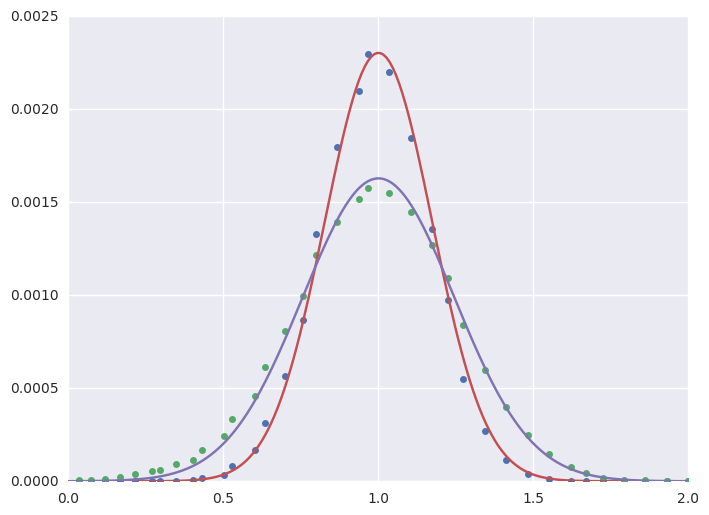

In [240]:
filename1='../../athena++/visc/athena/bin/comb/Curve1'
filename2='../../athena++/visc/athena/bin/comb/Curve2'

with open(filename1, "r") as f1:
    for line in f1:
      data=line.split(',')
x1 = np.zeros(len(data)/2)
y1 = np.zeros(len(data)/2)
for i in np.arange(len(data)/2):
#    print data[2*i]#,data[2*i+1]
    x1[i] = float(data[2*i])
    y1[i] = float(data[2*i+1])


with open(filename2, "r") as f2:
    for line in f2:
      data=line.split(',')

x2 = np.zeros(len(data)/2)
y2 = np.zeros(len(data)/2)
for i in np.arange(len(data)/2):
#    print data[2*i]#,data[2*i+1]
    x2[i] = float(data[2*i])
    y2[i] = float(data[2*i+1])

matplotlib.rcParams['figure.figsize'] = (8, 6.0)
plt.plot(x1,y1,'.',markersize=10)
plt.plot(x2,y2,'.',markersize=10)

x1_ana=np.linspace(-5,5,1000)
t=0.5
vy_ana = v0/np.sqrt(4.0*np.pi*nu*t)*np.exp(-(x1_ana-x0)**2/4.0/nu/t)
plt.plot(x1_ana,vy_ana)
t=1.0
vy_ana = v0/np.sqrt(4.0*np.pi*nu*t)*np.exp(-(x1_ana-x0)**2/4.0/nu/t)
plt.plot(x1_ana,vy_ana)
plt.xlim(0,2)





# Viscously expanding ring 

## 1 solve diffusion equation with FiPy
The diffusion equation reads,

$\frac{\partial \Sigma}{\partial t} = (3\nu/R) \partial_R [R^{1/2}\partial_R (R^{1/2}\Sigma)] $

if we define $y\equiv x\Sigma/2$ and $x\equiv 2 R^{1/2}$, we can rewrite the above equation as the standard diffusion equation:

$\frac{\partial y}{\partial t} = D\frac{\partial^2 y}{\partial x^2} $,

where $D = 12\nu/x^2$. 

The following plot shows the inital density profile and $t=100$ when $\nu=1e-5$


2.0
t=  0.0
t=  100.0


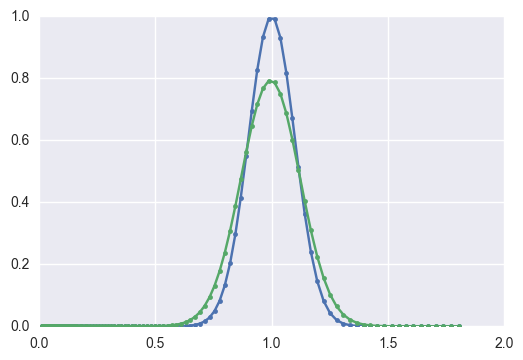

In [110]:
%matplotlib inline
#%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ath
import seaborn
from fipy import *



# construct the grid and initial gaussian profile
nx = 100
dx = 0.025
r_int = 0.2
L = nx*dx
mesh = Grid1D(nx=nx, dx=dx)+r_int
x = mesh.cellCenters[0]
x0 = 2.; sigma=0.1; fnorm = 1.0 #numerix.sqrt(2.*np.pi)*sigma

phi_diff = CellVariable(name="diffusion",  mesh=mesh, value=0.)
phi_diff.setValue(numerix.exp(-((x/2)**2-(x0/2)**2)**2/2./sigma**2)/fnorm*0.5*x, where=(x>x0-L/3) & (x<x0+L/3))

valueLeft = 0
#valueRight = 0
#phi.constrain(valueRight, mesh.facesRight)
phi_diff.constrain(valueLeft, mesh.facesLeft)

nu = 1e-5
D = nu*12.0

eq_diff = TransientTerm(coeff=x**2,var=phi_diff) == ImplicitDiffusionTerm(coeff=D,var=phi_diff)
    
timeStepDuration = 2.0 #9 * dx**2 / (2 * D)
steps = 0
print timeStepDuration

for step in range(steps):
  eq_diff.solve(var=phi_diff,dt=timeStepDuration)

print 't= ',steps*timeStepDuration
plt.plot(np.array((x/2.0)**2),np.array(phi_diff/x*2.0),'.-')

steps= 50
for step in range(steps):
  eq_diff.solve(var=phi_diff,dt=timeStepDuration)

print 't= ',steps*timeStepDuration


## store the numerical sol at t=250 for comparison with simulations
x_ana = np.array((x/2.0)**2)
y_ana = np.array(phi_diff/x*2.0)
plt.plot(x_ana,y_ana,'.-')



## 2 comparison with simulations

$N_r = 128$ for $r\in [0.2,2.2]$, $N_{\phi}=64$ for $2\pi$; $GM=1$ and $c_s=1e-3$ in order to diminish the pressure effect; $\nu=1e-5$.

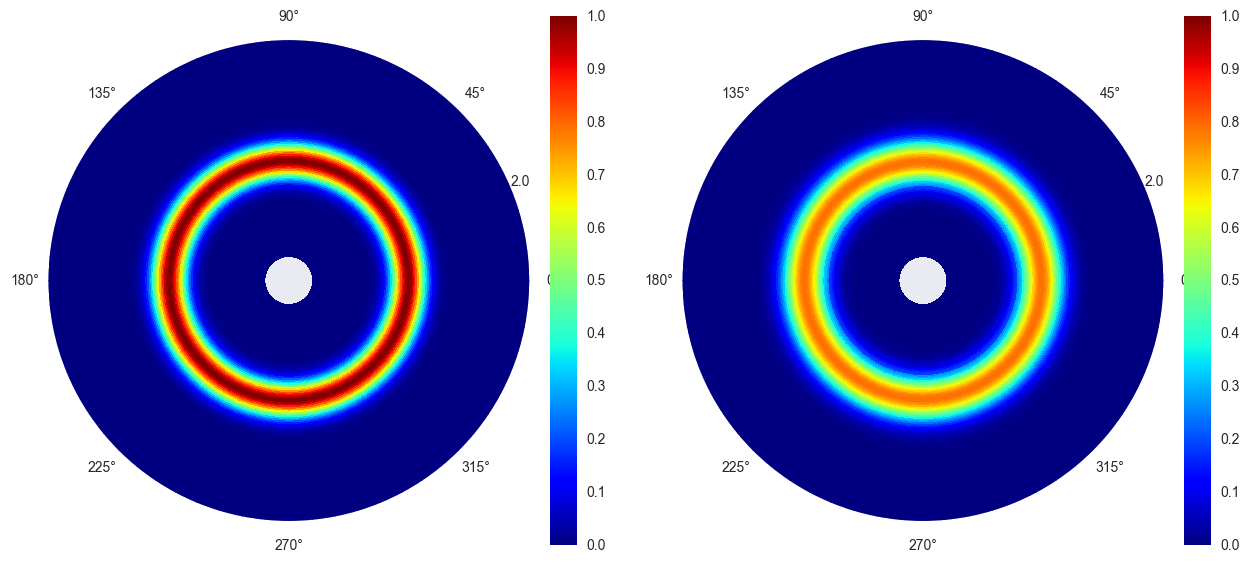

In [112]:
filename='../../athena++/visc/athena/bin/ring.hires/ring.00000.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='../../athena++/visc/athena/bin/ring.hires/ring.00050.vtk'
#filename='../../athena++/visc/athena/bin/visc.block0.out1.00050.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
#x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

R,T  = np.meshgrid(x1f,x2f)

nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.05;pad=0.04

plt.subplot(nframe,nplot,cnt,projection='polar')
plt.pcolormesh(T,R,data['dens'][0,:,:],cmap='jet',vmin=0,vmax=1)
plt.colorbar(fraction=fraction,pad=pad)

cnt +=1
plt.subplot(nframe,nplot,cnt,polar=True)
plt.pcolormesh(T,R,data1['dens'][0,:,:],cmap='jet',vmin=0,vmax=1)
plt.colorbar(fraction=fraction,pad=pad)

(0, 1.1)

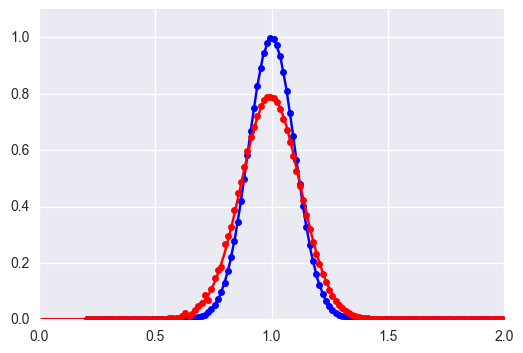

In [113]:
d0 = data['dens'][0,0,:]
d1 = data1['dens'][0,0,:]

matplotlib.rcParams['figure.figsize'] = (6,4)
plt.plot(x1v,d0,'.b',markersize=10,)
y0 = np.exp(-(x_ana-1.0)**2/2.0/0.1**2)
plt.plot(x_ana,y0,'-b')
plt.plot(x1v,d1,'.r',markersize=10)
plt.plot(x_ana,y_ana,'-r')
plt.ylim(0,1.1)

# field diffusion
$\vec{B} =(0,B_y,0)$, where $B_y = B_0/\sqrt{4\pi\eta t} \exp{(-(x-x_0)^2/4\eta t)}$ is the analytic solution to

$\partial_t B_y = \eta \partial^2_x B_y$, 

where the initial conditions are at $t=0.5$, $x_0=0.0$, $\eta=0.03$, and $B_0=0.001$. 

## 1.  Cartesian coordinates

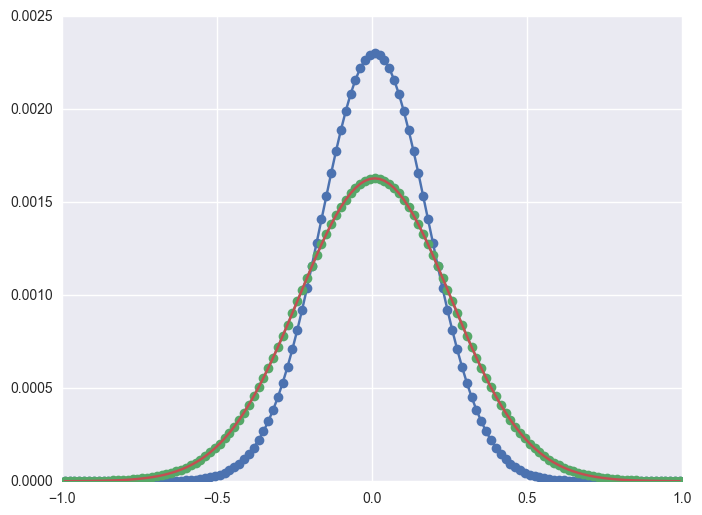

In [115]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/cart/res.block0.out2.00000.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='/home/jmshi/athena++/visc/athena.resist/bin/cart/res.block0.out2.00005.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00005.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])

by_t0 = data['Bcc'][0,8,:,1]
by_t1 = data1['Bcc'][0,8,:,1]
b0=1e-3; eta=0.03; x0=0.0; t=1.0
by_ana = b0/np.sqrt(4.0*np.pi*eta*t)*np.exp(-(x1f[:-1]-x0)**2/4.0/eta/t)

matplotlib.rcParams['figure.figsize'] = (8,6)
plt.plot(x1v,by_t0,'-o')
plt.plot(x1v,by_t1,'-o')
plt.plot(x1v,by_ana)

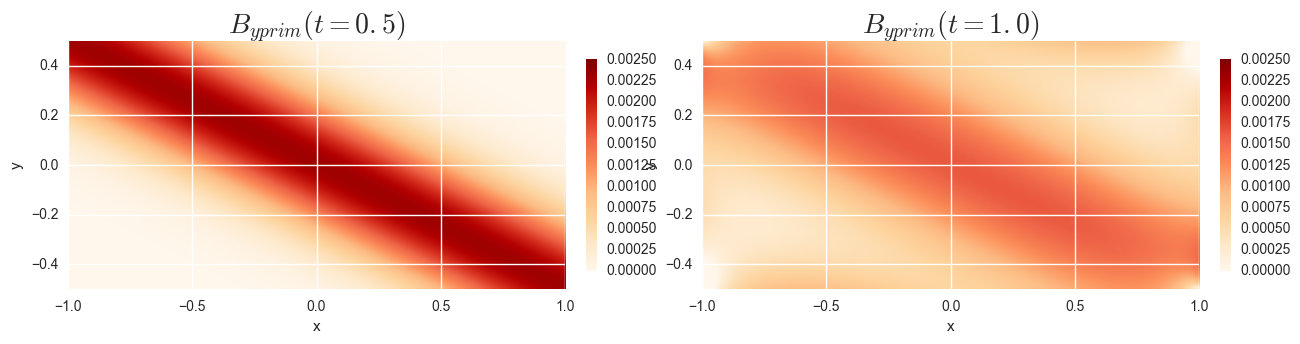

In [117]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/cart_diag/res.block0.out2.00000.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='/home/jmshi/athena++/visc/athena.resist/bin/cart_diag/res.block0.out2.00005.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00005.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])

xx,yy = np.meshgrid(x1v,x2v)
sintheta = 2./np.sqrt(5.)
costheta = 1./np.sqrt(5.)

bp_t0=data['Bcc'][0,:,:,1]*costheta-data['Bcc'][0,:,:,0]*sintheta
bp_t1=data1['Bcc'][0,:,:,1]*costheta-data1['Bcc'][0,:,:,0]*sintheta

b0=1e-3; eta=0.03; x0=0.0; t=1.0
by_ana = b0/np.sqrt(4.0*np.pi*eta*t)*np.exp(-(x1f[:-1]-x0)**2/4.0/eta/t)


nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.02;pad=0.04

plt.subplot(nframe,nplot,cnt)
plt.imshow(bp_t0,origin='lower',vmin=0,vmax=0.0025,extent=[-1,1,-0.5,0.5],aspect=1,cmap='OrRd')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(-1,1)
#plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$B_{yprim} (t=0.5)$',size=20)

cnt += 1
plt.subplot(nframe,nplot,cnt)
plt.imshow(bp_t1,origin='lower',vmin=0,vmax=0.0025,extent=[-1,1,-0.5,0.5],aspect=1,cmap='OrRd')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(-1,1)
#plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$B_{yprim} (t=1.0)$',size=20)

# plt.plot(x1v,by_t0,'-o')
# plt.plot(x1v,by_t1,'-o')
# plt.plot(x1v,by_ana)

<img src='figure/resist_cart_diag.png' width=500>

## 2. cylindrical coordinates

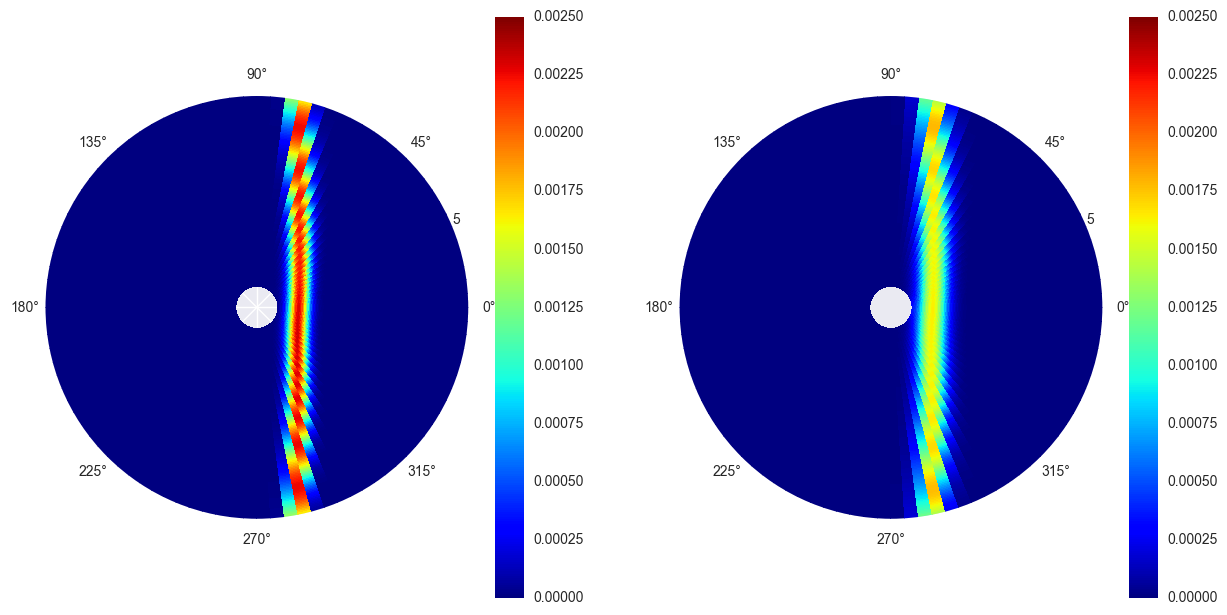

In [119]:
filename='../../athena++/visc/athena.resist/bin/cyl/res.block0.out2.00000.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='../../athena++/visc/athena.resist/bin/cyl/res.block0.out2.00006.vtk'
#filename='/home/jmshi/athena++/visc/athena/bin/res.block0.out2.00006.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
#x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

R,T  = np.meshgrid(x1v,x2v)
vr = data['Bcc'][0,:,:,0]#/data['dens'][2,:,:]
vt = data['Bcc'][0,:,:,1]#/data['dens'][2,:,:]
vy = vr*np.sin(T)+vt*np.cos(T)
vr1 = data1['Bcc'][0,:,:,0]#/data1['dens'][2,:,:]
vt1 = data1['Bcc'][0,:,:,1]#/data1['dens'][2,:,:]
vy1 = vr1*np.sin(T)+vt1*np.cos(T)

R,T  = np.meshgrid(x1f,x2f)
nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.005;pad=0.04
plt.subplot(nframe,nplot,cnt,polar=True)
plt.pcolormesh(T, R, vy,cmap='jet',vmin=0,vmax=0.0025) #X,Y & data2D must all be same dimensions
plt.colorbar()
plt.grid(True)
cnt+=1
plt.subplot(nframe,nplot,cnt,polar=True)
plt.pcolormesh(T, R, vy1,cmap='jet',vmin=0,vmax=0.0025)
plt.colorbar()
plt.show()

(96, 128) (96, 128) (96, 128)


(0, 2)

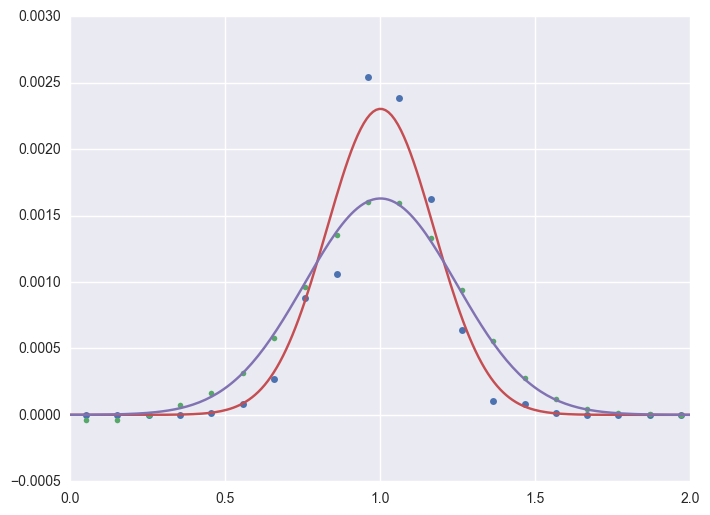

In [84]:
from scipy import interpolate

R,T  = np.meshgrid(x1v,x2v)
xx = R*np.cos(T); yy = R*np.sin(T)
print xx.shape,yy.shape,vy.shape

f = interpolate.interp2d(xx, yy, vy,kind='linear')
f1 = interpolate.interp2d(xx, yy, vy1,kind='cubic')

matplotlib.rcParams['figure.figsize'] = (8, 6.0)
xx0=np.linspace(-5,5,100)
yy0=np.linspace(0.25,0.25,100)
znew = f(xx0, yy0)
znew1 = f1(xx0,yy0)

plt.plot(xx0,znew[0,:],'.',markersize=10)
plt.plot(xx0,znew1[0,:],'.',markersize=8)

x1=np.linspace(-5,5,1000)
t=0.5; v0 = 1e-3; eta=0.03; x0=1.0
vy_ana = v0/np.sqrt(4.0*np.pi*eta*t)*np.exp(-(x1-x0)**2/4.0/eta/t)
plt.plot(x1,vy_ana)
t=1.0
vy_ana = v0/np.sqrt(4.0*np.pi*eta*t)*np.exp(-(x1-x0)**2/4.0/eta/t)
plt.plot(x1,vy_ana)
plt.xlim(0,2)

# diffusion of field loop

field loop in cartesian coord, with $|B_{\phi}|=1e-3$

$\vec{B}=\nabla\times\vec{A}$, $\vec{A}=(0,0,1e-3\times(r_0-r))$, 

uniform $\eta_{O}=0.1$

In [81]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/eta=0.1/Loop.block0.out2.00000.vtk'
time,x1f,x2f,x3f,data=ath.vtk(filename)
filename='/home/jmshi/athena++/visc/athena.resist/bin/eta=0.1/Loop.block0.out2.00020.vtk'
time1,x1f,x2f,x3f,data1=ath.vtk(filename)

x1v = x1f[:-1]+0.5*(x1f[1]-x1f[0])
x2v = x2f[:-1]+0.5*(x2f[1]-x2f[0])
#x3v = x3f[:-1]+0.5*(x3f[1]-x3f[0])

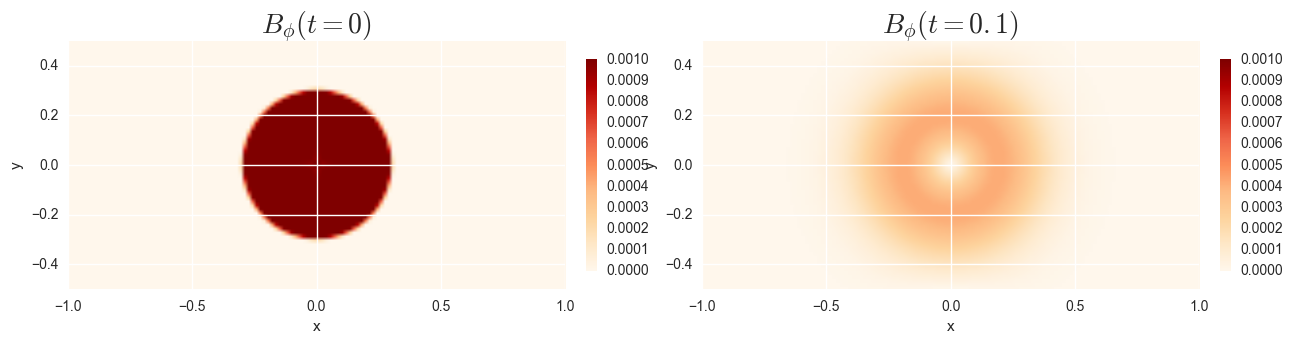

In [115]:
nframe = 1
nplot  = 2
cnt = 1
matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
fraction=0.02;pad=0.04

xx,yy = np.meshgrid(x1v,x2v)
rad = np.sqrt(xx**2+yy**2)
sintheta = yy/rad
costheta = xx/rad

bp_t0=data['Bcc'][0,:,:,1]*costheta-data['Bcc'][0,:,:,0]*sintheta
bp_t1=data1['Bcc'][0,:,:,1]*costheta-data1['Bcc'][0,:,:,0]*sintheta

plt.subplot(nframe,nplot,cnt)
plt.imshow(bp_t0,origin='lower',vmin=0,vmax=1e-3,extent=[-1,1,-0.5,0.5],aspect=1,cmap='OrRd')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(-1,1)
#plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$B_{\phi} (t=0)$',size=20)

cnt += 1
plt.subplot(nframe,nplot,cnt)
plt.imshow(bp_t1,origin='lower',vmin=0,vmax=1e-3,extent=[-1,1,-0.5,0.5],aspect=1,cmap='OrRd')
plt.colorbar(fraction=fraction,pad=pad)
#plt.xlim(-1,1)
#plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$B_{\phi} (t=0.1)$',size=20)

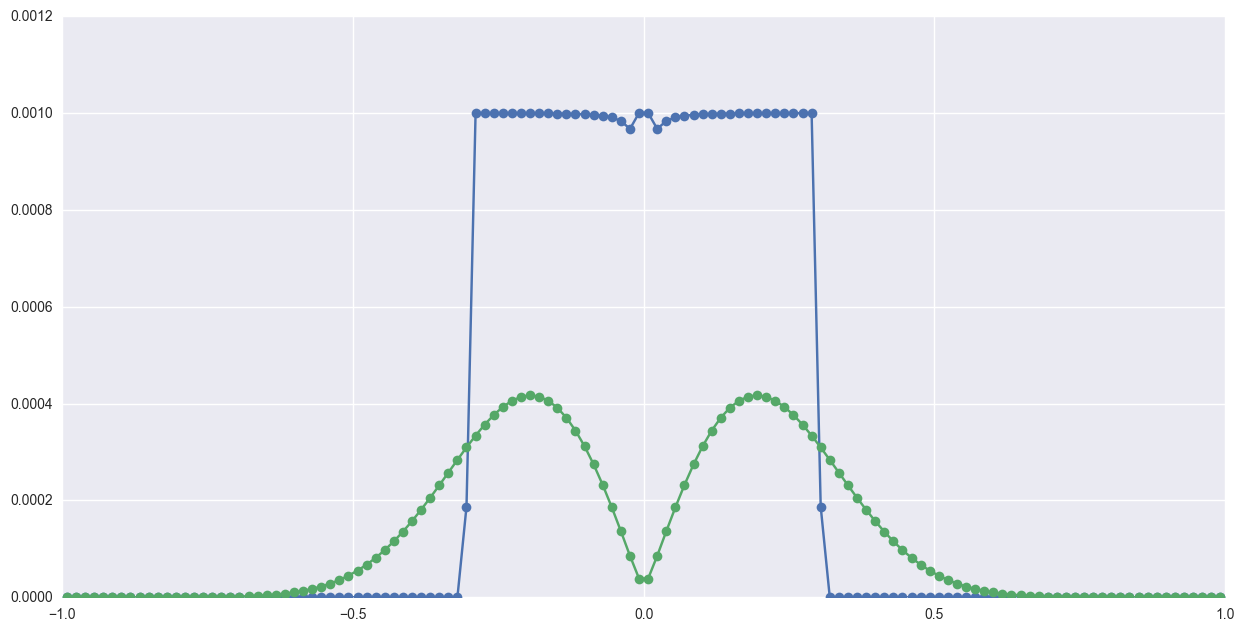

In [116]:
plt.plot(x1v,bp_t0[32,:],'-o')
plt.plot(x1v,bp_t1[32,:],'-o')

# Decaying linear wave test

Decay rate of Alfven wave  

$\Gamma_A = (\nu+\eta)k^2/2$

$\Gamma_f = \frac{k^2}{2(c_f^2-c_s^2)}[c_f^2(7\nu/3+\eta)-B_0^2\nu/\rho_0-c_A^2(\nu/3)-a^2(\nu+\eta)]$

$\Gamma_s = \frac{k^2}{2(c_f^2-c_s^2)}[-c_s^2(7\nu/3+\eta)+B_0^2\nu/\rho_0+c_A^2(\nu/3)+a^2(\nu+\eta)]$



## 1. decay of Alfven wave   ($\eta =0.02$, $\nu = 0$) 

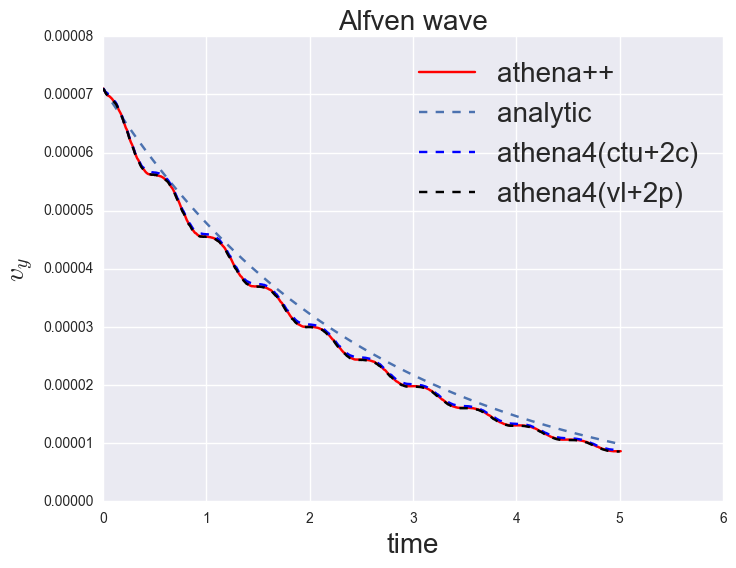

In [125]:
matplotlib.rcParams['figure.figsize'] = (8,6)
# decay of alfven wave 
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW01'
#filename='/home/jmshi/athena++/visc/athena/bin/LW01'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
k2=(2*np.pi)**2
r1 = 0.5*(0.02)*k2
vy_ana = vy[0]*np.exp(-r1*tt)
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')


#####################
# data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW01'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
#plt.xlabel('time',fontsize='20')
#plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
filename='/home/jmshi/athena++/athena4/bin/LW01-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)',markersize=5)
plt.legend(loc='upper right',fontsize=20)
plt.title('Alfven wave',fontsize=20)

## 2. decay of fast and slow wave ($\eta = 0$, $\nu = 0.02$)

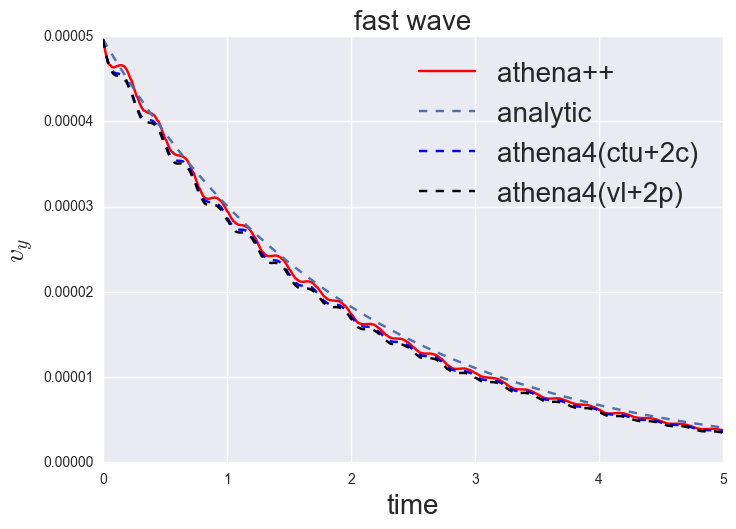

In [58]:

filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW02'
#filename='/home/jmshi/athena++/visc/athena.resist/bin/LW02-visc'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
k2=(2.*np.pi)**2
r2 = 0.5*(57./45.)*(0.02)*k2
vy_ana = np.exp(-r2*tt)*vy[0]
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
# data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW02'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW02-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')
plt.legend(loc='upper right',fontsize=20)
plt.title('fast wave',fontsize=20)


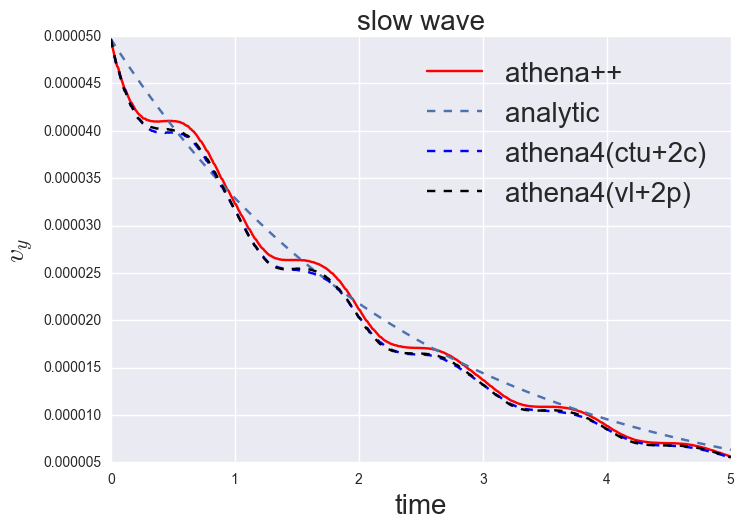

In [57]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW03'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
k2=(2.*np.pi)**2
r3 = 0.5*(47./45.)*(0.02)*k2
vy_ana = np.exp(-r3*tt)*vy[0]
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
# data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW03'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW03-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')
plt.legend(loc='upper right',fontsize=20)
plt.title('slow wave',fontsize=20)

## 3 decay of Alfven wave ($\eta=0.01$, $\nu=0.02$)

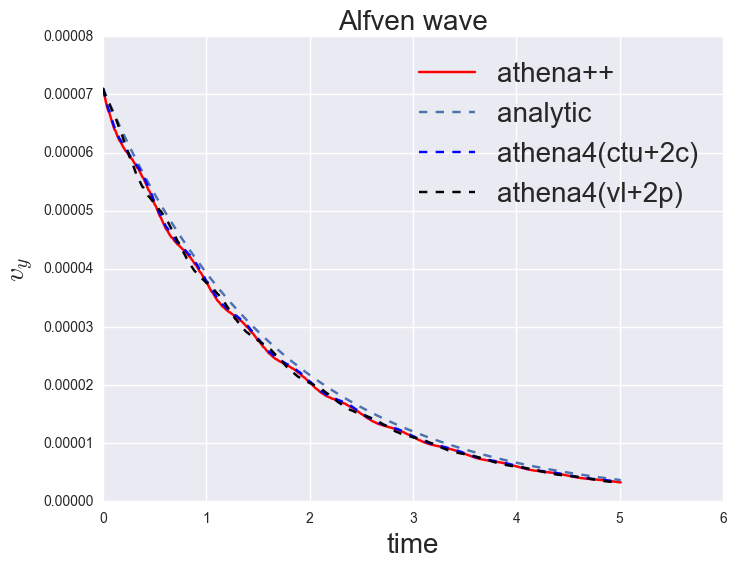

In [123]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW04'
filename='/home/jmshi/athena++/visc/athena/bin/LW04'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
k2=(2.*np.pi)**2
r3 = 0.5*(0.02+0.01)*k2
vy_ana = np.exp(-r3*tt)*vy[0]
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
 # data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW04'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW04-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')
plt.legend(loc='upper right',fontsize=20)
plt.title('Alfven wave',fontsize=20)

## 4. decay of fast and slow waves ($\eta=0.01$, $\nu=0.02$)

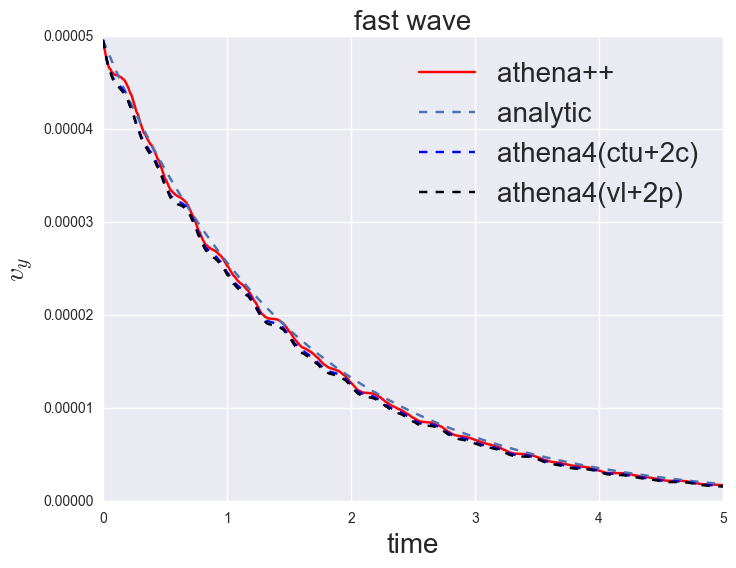

In [89]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW05'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')

# filename='/home/jmshi/athena++/visc/athena/bin/LW05'
# data = np.loadtxt(filename,delimiter=' ')
# tt = data[:,0]*0.01
# vy = data[:,1]
# plt.plot(tt,vy,'--g',label='branch')

#decay rate
k2=(2.*np.pi)**2
r3 = 0.5*(150./45.)*(0.01)*k2
vy_ana = np.exp(-r3*tt)*vy[0]
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
 # data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW05'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW05-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')

plt.legend(loc='upper right',fontsize=20)
plt.title('fast wave',fontsize=20)

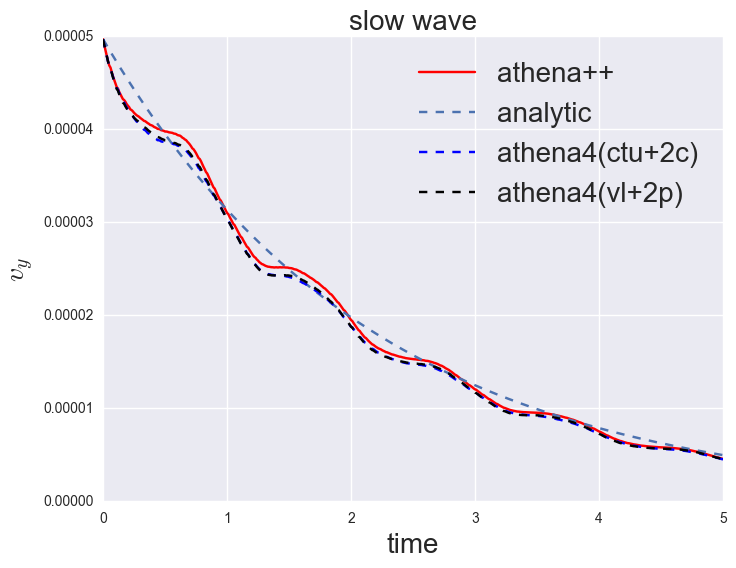

In [91]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW06'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')

# filename='/home/jmshi/athena++/visc/athena/bin/LW06'
# data = np.loadtxt(filename,delimiter=' ')
# tt = data[:,0]*0.01
# vy = data[:,1]
# plt.plot(tt,vy,'--g',label='branch')


#decay rate
k2=(2.*np.pi)**2
r3 = 0.5*(105./45.)*(0.01)*k2
vy_ana = np.exp(-r3*tt)*vy[0]
plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
 # data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW06'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW06-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')
plt.legend(loc='upper right',fontsize=20)
plt.title('slow wave',fontsize=20)

## 5.   slow wave time evolution without explicit diffusivities

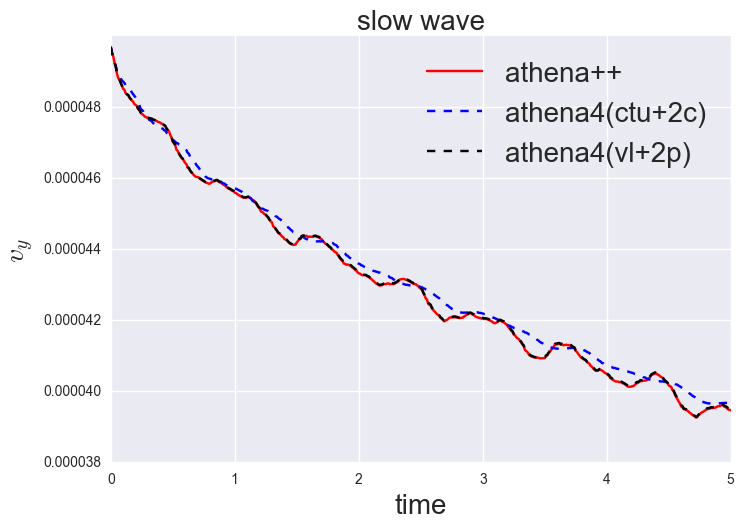

In [61]:
filename='/home/jmshi/athena++/visc/athena.resist/bin/LW_decay/LW07'
data = np.loadtxt(filename,delimiter=' ')
tt = data[:,0]*0.01
vy = data[:,1]
plt.plot(tt,vy,'-r',label='athena++')
plt.xlabel('time',fontsize='20')
plt.ylabel(r'$v_y$',fontsize='20')
#decay rate
k2=(2.*np.pi)**2
r3 = 0.5*(105./45.)*(0.01)*k2
vy_ana = np.exp(-r3*tt)*vy[0]
#plt.plot(tt,vy_ana,'--',markersize=10,label='analytic')

###################
 # data from athena4
filename='/home/jmshi/athena++/athena4/bin/LW07'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--b',label='athena4(ctu+2c)')
filename='/home/jmshi/athena++/athena4/bin/LW07-vl'
data = np.loadtxt(filename,delimiter=' ')
tt4 = data[:,0]*0.01
vy4 = data[:,1]
plt.plot(tt4,vy4,'--k',label='athena4(vl+2p)')
plt.legend(loc='upper right',fontsize=20)
plt.title('slow wave',fontsize=20)

# TEST the merging of shearingbox and diffusion

with zero-net-flux unstratified box. Problem generator hgb.  $1\times 4\times 1$ box, $64\times128\times 64$ resolution. $Re=3125$, and $Pm=4$. Performed both with athena++ and athena, compiled with intel-17 and intel-16 w/o openmp. $4\times10^5$ vs. $2\times10^5$ zone-cycles/second


with athena++: <\alpha> =  0.0110904476115
with athena++, 128/H: <\alpha> =  0.0124269237962
with athena4:  <\alpha> =  0.0103310983239


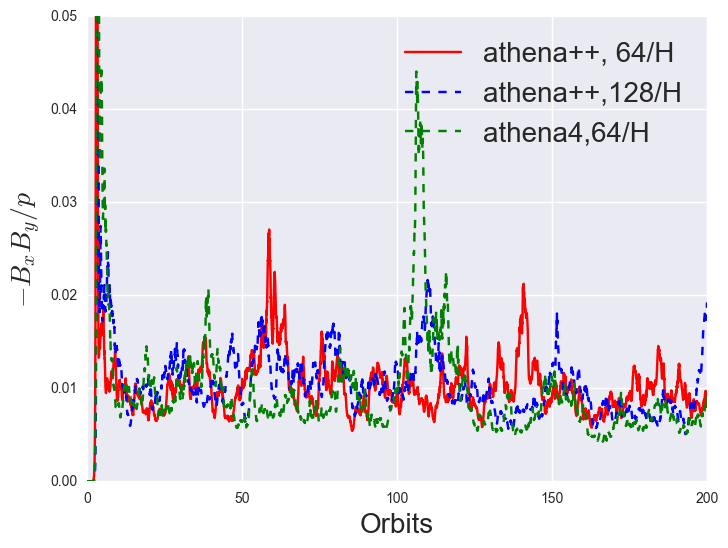

In [163]:
targ = '/home/jmshi/athena++/athena/bin/'

fname=targ+'Unstra.hst'
dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8')])
a = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12))

fname=targ+'Unstra_r128.hst'
dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
a1 = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))

fname=targ+'Unstra_athena4.hst'
dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('reynolds','f8'),('maxwell','f8')])
b = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,17))

plt.figure()
omg=1.0
rho0=1.0
cs = 1.0
pres = rho0*cs**2
torb=2.*np.pi/omg

plt.plot(a['time']/torb,a['maxwell']/pres/4.0,'r',label='athena++, 64/H')
plt.plot(a1['time']/torb,a1['maxwell']/pres/4.0,'b--',label='athena++,128/H')
plt.plot(b['time']/torb,b['maxwell']/pres,'g--',label=r'athena4,64/H')
#plt.plot(a['time']/torb,(a['em3']+a['em1']+a['em2'])/pres,'b',label=r'$1/\beta$')
#plt.yscale('log')
plt.ylim([0,0.05])
plt.xlim([0,200])
plt.xlabel('Orbits',fontsize=20)
plt.ylabel(r'$-B_xB_y/p$',fontsize=20)
plt.legend(fontsize=20)

alpha=a['maxwell']/pres/4.0
#print alpha.shape
print 'with athena++: <\\alpha> = ', np.average(alpha[:-10000])
alpha=a1['maxwell']/pres/4.0
#print alpha.shape
print 'with athena++, 128/H: <\\alpha> = ', np.average(alpha[:-10000])
alpha=b['maxwell']/pres
#print alpha.shape
print 'with athena4:  <\\alpha> = ', np.average(alpha[:-10000])